# A6 Clinical Predictive Modeling [𐄡]

#### Welcome to A6! 

Please enter answers to the questions in the specified Markdown cells below, and complete the code snippets in the associated python files and ipynb cells as specified. When you are done with the assignment, follow the instructions at the end of this assignment to submit.

**Grading**: All answers will be graded on the correctness and quality of your code and analyses. Partial credit will be given based on a demonstration of conceptual understanding and how close you can come to solving the problem. At various points we will ask you to produce particular values: the correctness of these numbers will not be used for your grade - they are tools for us to get an idea about what your code is doing.

### Learning Objective 🌱

In this assignment, you will work with a dataset very similar to what you analyzed in A5, to train and evaluate a machine learning model that predicts whether a patient will die during their ICU stay.

The first portion of this assignment is identical to the first portion of A5, to create the data used in subsequent sections.


### Resources 📖
- Pandas Cheat Sheet 🐼: [https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)



### Environment Set-Up 🐍
To begin, we will need to set up an virtual environment with the necessary packages. A virtual environment is a self-contained directory that contains a Python interpreter (aka Python installation) and any additional packages/modules that are required for a specific project. It allows you to isolate your project's dependencies from other projects that may have different versions or requirements of the same packages.

In this course, we require that you utilize [Miniconda](https://docs.conda.io/en/latest/miniconda.html) to manage your virtual environments. Miniconda is a lightweight version of [Anaconda](https://www.anaconda.com/), a popular Python distribution that comes with many of the packages that are commonly used in data science.

#### Instructions for setting up your environment using Miniconda:
1. If you do not already have Miniconda installed, download and install the latest version for your opperating system from the following link: [https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links](https://docs.conda.io/en/latest/miniconda.html#latest-miniconda-installer-links)

2. Create a new virtual environment for this assignment by running the following command in your terminal:

   ```bash
   conda env create -f environment.yml
   ```

   This will create a new virtual environment called `biomedin215`

3. Activate your new virtual environment by running the following command in your terminal:

   ```bash
   conda activate biomedin215
   ```

   This will activate the virtual environment you created in the previous step.

4. Finally, ensure that your `ipynb` (this notebook)'s kernel is set to utilize
the `biomedin215` virtual environment you created in the previous steps. Depending on
which IDE you are using to run this notebook, the steps to do this may vary.


In [1]:
# Run this cell: 
# The lines below will instruct jupyter to reload imported modules before 
# executing code cells. This enables you to quickly iterate and test revisions
# to your code without having to restart the kernel and reload all of your 
# modules each time you make a code change in a separate python file.

%load_ext autoreload
%autoreload 2

In [2]:
# Run this cell to ensure the environment is setup properly
import pandas as pd
import numpy as np
import os
import warnings

print("Imported modules successfully.")

Imported modules successfully.


### *Note to Students:* 📚

>Throughout the assignment, we have provided `sanity checks`: small warnings that will alert you when your implementation is different from the solution. Our goal in providing these numbers is to help you find bugs or errors in your code that may otherwise have gone unnoticed. Please note: the sanity checks are just tools we provided to be helpful, and should not be treated as a target to hit. We manually grade each assignment based on the code you submit, and not based on whether you get the exact same numbers as the sanity checks.

If you are failing the sanity checks (even by a lot) and your implementation is correct with minor errors, you will still receive the majority of the points (if not all the points).

In [3]:
# Run this cell to set up sanity checks warnings
# Note: You do not need to change anything in this cell

# Creates a custom warning class for sanity checks
class SanityCheck(Warning):
    pass

# Sets up a cosutom warning formatter
def custom_format_warning(message, category, filename, lineno, line=None):
    if category == SanityCheck:
        # Creates a custom warning with orange text
        return f'\033[38;5;208mSanity Check - Difference Flagged:\n{message}\033[0m\n'
    
    return '{}:{}: {}: {}\n'.format(filename, lineno, category.__name__, message)

# Sets the warning formatter for the entire notebook
warnings.formatwarning = custom_format_warning

### Data Description 📂

In this assignment, you will work with a dataset that we have prepared for you using a process similar to what you did in previous homeworks. The dataset describes patients from the [MIMIC III database](https://mimic.physionet.org/mimictables/patients/) who were put on mechanical ventilation and were stable for 12 hours. Some of these patients then experienced a sudden and sustained drop in oxygenation, while others did not. You will practice using common time-saving tools in the **Pandas 🐼** library and **Python 🐍** programming language that are ideally suited to these tasks.

We have recorded a variety of features about each patient before the 12-hour mark (the index time), including counts of all prior diagnoses (aggregated with IC), all respiratory-related concepts in their notes, and indicators of events recorded in the patient charts. Indicator features are the number of times each event was recorded in the patient record, regardless of what the measured value was. For those chart events which have numeric values associated with them (e.g. lab tests) we found those in which a value was recorded for over 85% of the cohort and included the latest recorded value of those features. In addition, we have included demographic features (age and sex). For the small number of patients who did not have one or more of those features recorded, we used column-mean imputation to impute them. We also recorded whether or not each patient went on to experience a sudden and sustained drop in their oxygenation (the exposure). Finally, we recorded whether or not each patient eventually died during their hospitalization (the outcome). All of this data is contained in `patient_feature_matrix.csv`. 

The companion file `feature_descriptions.csv` has descriptions of each of the features and their provenance. 

The final dataset you have access to is called `cohort.csv`, which contains the index time, exposure time (if any), in-hospital time of death (if any), and the time of censoring (when the patient was released from the hospital).

**All of the data you need for this assignment is available on Canvas.** 

Once you have downloaded and unzipped the data, you should see the following `3` csv files:
- `patient_feature_matrix.csv`

- `cohort.csv`

- `feature_descriptions.csv`

**Specify the location of the folder containing the data in the following cells:**

In [4]:
# Specify the path to the folder containing the data files
data_dir = "/Users/stevenang/DataspellProjects/biomedin215/assignments/A6/data" # <-- TODO: You will need to change this path

In [5]:
# Run this cell to make sure all of the files are in the specified folder
expected_file_list = ["patient_feature_matrix.csv", "cohort.csv", "feature_descriptions.csv"]

for file in expected_file_list:
    assert os.path.exists(os.path.join(data_dir, file)), "Can't find file {}".format(file)

print("Sanity check: Success")

Sanity check: Success


In [6]:
# Run this cell to load the data from the CSV files into Pandas DataFrames
patient_feature_matrix = pd.read_csv(os.path.join(data_dir, "patient_feature_matrix.csv"))
cohort = pd.read_csv(os.path.join(data_dir, "cohort.csv"))
feature_descriptions = pd.read_csv(os.path.join(data_dir, "feature_descriptions.csv"))

In [7]:
# (OPTIONAL TODO:) It is always a good idea to filter out columns that you don't need from DataFrames.
# As always, feel free to add code to your notebooks to do this. This is not required for the assignment.
# You may want to come back to this later when you are more familiar with the data and know which columns you need.

# `1` (`0 Points`) Preprocessing

Lets start by preprocessing the data (just like we did in A5). We have provided
you with a file called `preprocess.py` that contains functions that perform the
preprocessing steps you implemented in `A5`. You do not need to modify this file
or code in the following cells.

## `1.1` (`0 Points`) Create Feature Matrix and Outcome Vector

Run the following cell to split the patient feature matrix up into `features` and `labels` dataframes.

In [8]:
from src.preprocessing import split_labels_and_features

# Run this cell to split the labels from the features
features, labels = split_labels_and_features(patient_feature_matrix,
                                             {"oxy_drop": {"stable": 0, "oxy_drop":1},
                                              "death_in_stay": {"survived": 0, "died": 1},
                                              "gender": {"M":0, "F": 1}})

##### `Important note to students:`

It's worth noting that the definition of `gender` in the `MIMIC-III` database and many other clinical databases is a simplified representation of gender that does not account for a range of gender identities and expressions, and most often isn't distinguished from biological sex which may or may not reflect an individual's self-identified gender identity (SIGI). Increasingly, EHR schemas are updated/designed to capture SIGI in addition to biological sex to improve care for transgender and gender nonconforming (TGNC) patients.

As you continue your journey in medical data science, remember that it is critically important to always review the schema of the dataset you are working with to ensure that you know how different data fields are defined, so that you can fully understand the assumptions and limitations of your downstream analysis.

## `1.2` (`0 Points`) Removing Uninformative Features

Before we do any modeling, let's cut down on our feature space by removing `low-variance features` that probably aren't useful enough to measure association with or use in a predictive model. 

Run the following cell.

In [9]:
from src.preprocessing import feature_variance_threshold

# Run this cell to remove features with low variance
filtered_features = feature_variance_threshold(features, freq_cut=95/5, unique_cut=0.1)

For the rest of the assignment, we will be working with this filtered version of the dataframe.

# `2` (`100 Points`) Predictive Analyses

In this section we will train a predictive model utilizing supervised learning techniques to predict whether a patient will die during their hospitalization, given only the data from before the end of their 12-hour long stable ventilation period (prior to the index time).

## `2.1` (`5 Points`) Creating training and test sets

The first step of any predictive modeling task is to split our dataset into training and test sets: subsets of the data that we will use to train and evaluate our model respectively.

The `train` set is a subset of the original data set on which the machine learning model is trained. It consists of input-output pairs where the inputs are the features or predictors, and the outputs are the labels or targets the model aims to predict. During the training phase, the model learns to recognize patterns or mappings from inputs to outputs. The quality and diversity of the training data are crucial, as they determine the model's ability to generalize to new, unseen data.

The `test` set is a **seperate** subset of the original data that is used to evaluate the performance of the model after the training phase. It is crucial that the data in the test set has not been used during training. The purpose of the test set is to assess how well the model generalizes to new data - that is, its predictive performance on examples it hasn't encountered during training.

Utilizing a training/test split is a fundamental concept in machine learning and data science workflows that allows us to get an estimate of how well our model will perform on unseen data, and determine if our model is overfitting to the training data. In real world applications, it is a best practice to split the data into three subsets: `train`, `validation`, and `test` sets. The `validation` set is used to assess the performance of the model on unseen data during the training phase, and is used to tune the hyperparameters of the model. By creating a `validation` set, the `test` set can be reserved to only be utilized to evaluate the final performance of the model after the training phase is complete. 

For simplicity, we will only be utilizing `train` and `test` sets in this assignment.

Let's randomly split the examples in our dataset into `train` and `test` sets. We will use `80%` of the data for training, and `20%` for testing. Implement the function `split_train_test` in `data.py` to split the data into `train` and `test` sets.

In [10]:
from src.data import split_data

# Run this cell to split the data into training and test sets
train_features, test_features, train_labels, test_labels = split_data(filtered_features, labels, test_fraction=0.2, random_state=42)

# Sanity Check
if train_features.shape[0] != train_labels.shape[0]:
    warnings.warn("Training features and labels have different number of samples", SanityCheck)
if test_features.shape[0] != test_labels.shape[0]:
    warnings.warn("Test features and labels have different number of samples", SanityCheck)

# Ensure all rows in train_features and train_labels have same index
if not train_features.index.equals(train_labels.index):
    warnings.warn("Indices of train_features and train_labels are not equal", SanityCheck)
# Ensure all rows in test_features and test_labels have same index
if not test_features.index.equals(test_labels.index):
    warnings.warn("Indices of test_features and test_labels are not equal", SanityCheck)

# Reproducibility check: Ensure first index is 
if train_features.index[0] != 13010:
    warnings.warn(f"First index is not correct. Don't forget to set your random state!", SanityCheck)

# Ensure test features is test_fraction of total features
if test_features.shape[0] != int(0.2 * features.shape[0]):
    warnings.warn("Test features do not contain correct number of samples", SanityCheck)

# Ensure train features is 1-test_fraction of total features
if train_features.shape[0] != int(0.8 * features.shape[0]):
    warnings.warn("Train features do not contain correct number of samples", SanityCheck)


In [11]:
# Some of the functions we will use later require that labels are 1D arrays instead of DataFrames.
# Run this cell to convert the labels to 1D arrays
# NOTE: No need to change anything in this cell
train_labels = train_labels.values.ravel() # train_labels is now a 1D numpy array
test_labels = test_labels.values.ravel()   # test_labels is now a 1D numpy array

## `2.2` (`30 Points`) Exploratory Modeling

Let's explore a few different models we can use to perform our task!

### `2.2.1` (`10 Points`) Exploratory Logistic Regression

Regularization is a fundamental concept in machine learning and statistics, particularly in the context of regression and classification problems. It involves adding a penalty to the loss function that the algorithm is trying to minimize. The primary goal of regularization is to prevent overfitting, which occurs when a model learns the training data too well, including the noise, and performs poorly on unseen data.

There are many different types of regularization, but the two most common types are `L1` and `L2` regularization. Let's talk a bit more about these:

#### `L1` Regularization

Also known as `Lasso` regularization, `L1` regularization adds a penalty term to the loss function that is proportional to the sum of the absolute values of the coefficients of the model:

$ Penalty(\lambda) = \lambda \sum_{j=1}^{p} |\beta_{j}|$

In the equation above, $\beta_j$ are the coefficients of the model, while $\lambda$ is a hyper-parameter that controls how much the penalty term impacts the total loss. When $\lambda = 0$, the penalty term has no effect, and the lasso model reduces to a standard linear regression model. As $\lambda$ increases, and the regularization's impact on the total loss becomes greater.

L1 regularization induces `sparsity`, which means that it encourages as many coefficients in the model to be 0 as possible. L1 regularization is often beneficial in contexts where feature selection is important, as it simplifies the model by retaining the parameters that correspond to only the most important features.

#### `L2` Regularization

Also known as `Ridge` regularization, `L2` regularization adds a penalty term to the loss function that is proportional to the sum of the squared values of the coefficients of the model:

$ Penalty(\lambda) = \lambda \sum_{j=1}^{p} \beta_{j}^2$

Like in the equation for `L1` regularization, $\beta_j$ are the coefficients of the model, while $\lambda$ is a hyper-parameter that controls how much the penalty term impacts the total loss. 

Since L2 regularization penalizes the squared values of the coefficients, it discourages individual coefficients from becoming very large. This results in a model with smaller, more evenly distributed coefficient values. This can help stabilize the estimation, especially in the presence of highly correlated features. 

For this first problem, let's attempt to implement a logistic regression model with `L2` regularization. Implement the function `logistic_regression` in `models.py`. When you are finished, run the following cell.

In [12]:
from src.models import logistic_regression

# Run this cell to fit the model
# NOTE: You may see a warning about failed convergence. This is ok!
log_reg_model = logistic_regression(train_features, train_labels, lambda_=1e-4, max_iter=10000)

# Sanity Check:
if not hasattr(log_reg_model, "predict"):
    warnings.warn("Ensure the returned object is sklearn.linear_model._logistic.LogisticRegression", SanityCheck)

/Users/stevenang/DataspellProjects/biomedin215/assignments/A6/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Using the model we just trained, we can now make predictions on the test set!

In [13]:
# Run this cell to make predictions on the test set. No need to change anything in this cell
test_predictions = log_reg_model.predict(test_features)

Let's characterize the performance of our model by calculating the **accuracy**. Implement the function `accuracy` in `metrics.py` and run the following cell to calculate the accuracy of our model.

In [14]:
from src.metrics import accuracy
# Run this cell to calculate the accuracy of the model.
log_reg_accuracy = accuracy(test_labels, test_predictions)

# Display the accuracy of the model
print(f"Accuracy of the model on the test set: {log_reg_accuracy:.3f}")

# Sanity Check:
if log_reg_accuracy < 0.8:
    warnings.warn("Accuracy is too low, something is likely wrong with the model set up or accuracy calculation", SanityCheck)

Accuracy of the model on the test set: 0.813


If we only look at the accuracy metric we calculated above, our performance looks pretty good! Unfortunately, accuracy can be misleading. To understand why this is the case, let's do a small experiment.

Let's say we had a model that ALWAYS output a 0 for every example. What would the accuracy of this model be? Run the following cell to find out:

In [15]:
# Run this cell! (No need to change anything)

# This line creates an array of zeros with the same shape as the test labels
# This will act like the predictions from a model that predicts all zeros
all_zero_predictions = np.zeros_like(test_labels)

# Let's determine the accuracy of a model that predicts all zeros
all_zero_accuracy = accuracy(test_labels, all_zero_predictions)

# Display the accuracy of the model
print(f"Accuracy of model that just predicts all zeros on the test set: {all_zero_accuracy:.3f}\n")

# Display class balance
print(f"Class balance:\n{pd.Series(test_labels).value_counts(normalize=True)}")

Accuracy of model that just predicts all zeros on the test set: 0.806

Class balance:
0    0.806078
1    0.193922
Name: proportion, dtype: float64


Accuracy is not always a suitable metric for evaluating the performance of a model on a binary classification problem, especially when there is a significant **class imbalance**, like in this case where there's a majority of the '0' class. In this case, a model that always outputs '0' will have a high accuracy, but is clearly not a good model.

Let's explore some other metrics we can use to evaluate the performance of our model!

### `2.2.2` (`5 Points`) Confusion Matrix and Performance Metrics

One of the best ways we can evaluate the performance of a binary classification model is by utilizing a **confusion matrix**. 

A confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows you to visualize the accuracy of the model by comparing the actual target values with those predicted by the model.

Here is what a typical confusion matrix looks like for a binary classification problem. Each cell in the matrix represents the number of examples that fall into one of the four categories:
- True Positive: The model predicted the example to be positive, and the actual label was positive.
- False Positive: The model predicted the example to be positive, but the actual label was negative.
- True Negative: The model predicted the example to be negative, and the actual label was negative.
- False Negative: The model predicted the example to be negative, but the actual label was positive.

##### Confusion Matrix Example
|                   | Predicted: (0) | Predicted: (1) |
|-------------------|-------------------|--------------------|
| **Actual Label: (0)**   | # True Negative (TN) | # False Positive (FP) |
| **Actual Label: (1)**  | # False Negative (FN) | # True Positive (TP)  |

Implement the function `confusion_matrix` in `metrics.py` to calculate the confusion matrix for our model. When you are done, run the following cell to calculate the confusion matrix for our model.

In [16]:
from src.metrics import confusion_matrix

# Run this cell to calculate the confusion matrix
con_matrix = confusion_matrix(test_labels, test_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(con_matrix)

# Sanity Check: Ensure the confusion matrix is the correct shape
if con_matrix.shape != (2, 2):
    warnings.warn("Confusion matrix is not the correct shape", SanityCheck)

# Sanity Check: Ensure total of confusion matrix cells equals number of test samples
if con_matrix.sum() != test_labels.shape[0]:
    warnings.warn("Confusion matrix does not contain correct number of samples", SanityCheck)

Confusion Matrix:
[[528.  29.]
 [100.  34.]]


Another nice thing about confusion matrices is that they allow us to easy calculate a variety of other metrics that are useful for evaluating the performance of our model. Let's implement a few of these metrics!

**Sensitivity** (also called the true positive rate, or recall in some fields) measures the proportion of actual positives that are correctly identified by the test. It answers the question: "Of all the people who actually have the disease, how many did we correctly diagnose?" 

> **Recall** is the same as **sensitivity**: it measures the proportion of actual positives that are correctly identified. The term "recall" is more commonly used in machine learning, while "sensitivity" is more commonly used in medicine.

Implement the function `sensitivity` in `metrics.py` to calculate the sensitivity of our model. When you are done, run the following cell to calculate the sensitivity of our model.

In [17]:
from src.metrics import sensitivity

# Run this cell to calculate the sensitivity
sensitivity_value = sensitivity(con_matrix)

# Display the sensitivity
print(f"Sensitivity of the model on the test set: {sensitivity_value:.3f}")

Sensitivity of the model on the test set: 0.254


**Specificity** (also called the true negative rate) measures the proportion of actual negatives that are correctly identified by the test. It answers the question: "Of all the people who do not have the disease, how many did we correctly identify as not having the disease?"

Implement the function `specificity` in `metrics.py` to calculate the specificity of our model. When you are done, run the following cell to calculate the specificity of our model.

In [18]:
# Run the cell below to calculate the specificity
from src.metrics import specificity

specificity_value = specificity(con_matrix)

# Display the specificity
print(f"Specificity of the model on the test set: {specificity_value:.3f}")

Specificity of the model on the test set: 0.948


**Precision** (also called positive predictive value) measures the proportion of positive identifications that were actually correct. It answers the question: "Of all the people we diagnosed with the disease, how many actually have the disease?"

Implement the function `precision` in `metrics.py` to calculate the precision of our model. When you are done, run the following cell to calculate the precision of our model.

In [19]:
from src.metrics import precision

# Run this cell to calculate the precision
precision_value = precision(con_matrix)

# Display the precision
print(f"Precision of the model on the test set: {precision_value:.3f}")

Precision of the model on the test set: 0.540


In [20]:
# Added this code to verify my result using sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_labels, test_predictions)
print(matrix)

[[528  29]
 [100  34]]


In [21]:
# Added this code to verify my result using sklearn.metrics.classification_report
from sklearn.metrics import classification_report
report = classification_report(test_labels, test_predictions, target_names=['0: Survived', '1: Died'])
print(report)

              precision    recall  f1-score   support

 0: Survived       0.84      0.95      0.89       557
     1: Died       0.54      0.25      0.35       134

    accuracy                           0.81       691
   macro avg       0.69      0.60      0.62       691
weighted avg       0.78      0.81      0.79       691



**Describe what you see in the confusion matrix and other metrics above. What do they tell us?**

<span style="color:blue;">The model is especially good at determining individuals that did not die as negative (selecting true negative labels) indicated by the high specificity (0.948). However, it has a low sensitivity (0.254) which means that it is bad at correctly identifying true labels (patients who will die 12hrs into admission). The precision value of 0.54 also indicates that out of all predicted true labels (patients predicted to die during hospitalization), only around half were correct. There is overall an imbalance in dataset between negative and positive subjects as indicated by the confusion matrix, where there are larger number of subjects with true negative labels than positive labels.
</span>

### `2.2.3` (`10 Points`) ROC and PR Curves

As we learned in the previous assignment, logistic regression models (like the model we used above) calculate the predicted probability of an example belonging to the positive class (1). The metrics above provide valuable insights about the performance of the classifier, but they are limited by their dependence on what is called the model's `decision threshold`. The `decision threshold` is the probability threshold above which we predict an example as positive (1), and below which we classify an example as negative (0). In most machine learning frameworks, the default decision threshold is 0.5 (which was the case for the predictions we made above). Although these metrics are useful, their dependence on a single decision threshold of the model can be limiting. 

To achieve a more comprehensive assessment of our model's performance that spans various decision thresholds, we can construct the **receiver operating characteristic (ROC) curve** and the **precision-recall (PR) curve**. These tools enable us to visualize and understand the trade-offs between different threshold settings, thus providing a more dimensional view of the model's classification abilities.

In [22]:
# Run this cell to calculate the predicted probability of the positive class for each sample in the test set
# No need to change anything in this cell
test_probabilities = log_reg_model.predict_proba(test_features)[:,1]

#### Receiver Operating Characteristic (ROC) Curve

A ROC curve is a graphical representation that depicts the diagnostic capabilities of a binary classification system across a spectrum of decision thresholds. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold levels. The curve provides a comprehensive picture of the trade-off between sensitivity (or TPR) and specificity (1 - FPR) as the decision threshold is adjusted. 

<div style="text-align:center">
    <img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/647603c5a947b640e4b1eecd_classification_metrics_img_header-min.png" width="300"/>
    <figcaption> For a particular threshold value, the ROC curve shows the corresponding TPR and FPR </figcaption>
</div>

A metric that is commonly utilized to summarize the overall performance of the classifier is the `AUROC` or Area under the Receiver Operating Characteristic Curve (sometimes called ROC AUC). A higher AUROC (closer to 1) indicates a better performing model, because it means that for a given FPR, the corresponding TPR is higher on average.

<div style="text-align:center">
    <img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/64760408cdd765c3f8e364c3_classification_metrics_002-min.png" width="300"/>
    <figcaption> The area under the ROC curve </figcaption>
</div>


Let's think about this a little more:
A perfect Receiver Operating Characteristic (ROC) curve would show a sharp rise from the origin (0,0) to the top-left corner of the plot (0,1) and then run directly along the top edge of the graph to the top-right corner (1,1). This shape indicates that the classifier is able to achieve a 100% true positive rate (TPR) without incurring any false positives. In this case, the area under the curve (AUROC) would be 1.0, which is the maximum value possible.

On the other hand, a ROC curve for a classifier that performs no better than random guessing would be a diagonal line that runs from the bottom-left corner (0,0) to the top-right corner (1,1) of the ROC space. This line is often referred to as the line of no-discrimination and it indicates that the classifier’s true positive rate equals its false positive rate at all thresholds. In this case, the area under the curve (AUROC) would be 0.5.

<div style="text-align:center">
    <img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/647607123e84a06a426ce627_classification_metrics_014-min.png" width="300"/>
    <figcaption> The performance of three different models visualized with three curves. </figcaption>
</div>



Lets see what our model's ROC curve looks like! Implement the functions `calc_roc_curve` and `display_roc_curve` in `curves.py` to calculate the ROC curve for our model. When you are done, run the following cells to calculate the ROC curve for our model.

In [23]:
from src.curve import calc_roc_curve

# Run this cell to calculate the ROC curve
fpr, tpr = calc_roc_curve(test_labels, test_probabilities)

# Sanity Check: FPR and TPR
if fpr.shape[0] != 1000:
    warnings.warn("FPR has incorrect number of values", SanityCheck)

if tpr.shape[0] != 1000:
    warnings.warn("TPR has incorrect number of values", SanityCheck)

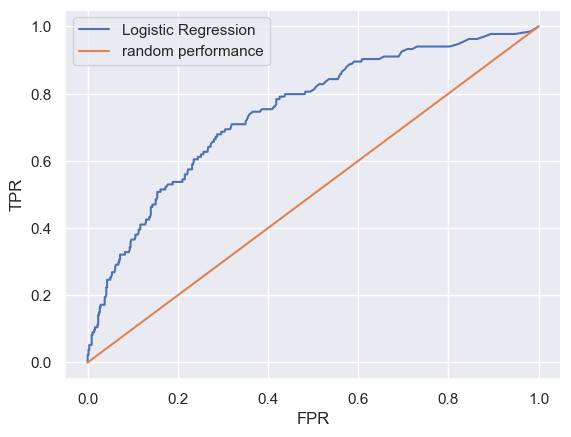

In [24]:
from src.curve import display_roc_curve

# Run this cell to display the ROC curve
display_roc_curve([(fpr, tpr)],["Logistic Regression"],"lr_roc.png")


In [25]:
# Lets determine the AUROC of our model
# Run this cell to import the auc function from sklearn
# No modifications needed in this cell
from sklearn.metrics import auc

# Run this cell to calculate the AUROC
auroc = auc(fpr, tpr)

# Display the AUROC
print(f"Area under the ROC curve: {auroc:.3f}")

Area under the ROC curve: 0.746


#### Precision-Recall (PR) Curve

Another comprehensive way to assess the performance of a classifier is a precision-recall (PR) curve, which is created by plotting recall on the x-axis and precision on the y-axis for different threshold values. 

PR curves are more informative than ROC curves when dealing with highly imbalanced datasets, as the ROC curve may present an overly optimistic view of the performance. 

- In an imbalanced dataset, the number of negative instances (the majority 0 class) leads to an extremely large number of True Negatives, as the model can simply learn to predict 0 for almost every example. This makes the false positive rate ($\frac{FP}{FP + TN}$) appear to be very small over a wide range of thresholds, which can make the model appear to perform better on the ROC curve even if it is merely classifying most instances as the majority class (similar to our example above where the model always predicted 0).

- The precision-recall curve swaps out the FPR term with precision, also known as the positive predictive value ($\frac{TP}{TP + FP}$). Since the precision term does not take into account true negatives, it is not affected by the class imbalance problem described above and can give a better sense of the model's performance in terms of the cost of false positives.


The precision-recall curve is a bit more difficult to interpret than the ROC curve, but it is still a useful tool for evaluating the performance of a classifier. A metric that is commonly utilized to summarize the overall performance of the classifier is the `AUPRC` or Area under the Precision-Recall Curve. A higher AUPRC (closer to 1) indicates a better performing model, because it means that for a given recall, the corresponding precision is higher on average.

In [26]:
from src.curve import calc_precision_recall_curve

# Run this cell to calculate the precision-recall curve
prec, recall = calc_precision_recall_curve(test_labels, test_probabilities)

# Sanity Check: FPR and TPR
if prec.shape[0] != 1000:
    warnings.warn("FPR has incorrect number of values", SanityCheck)

if recall.shape[0] != 1000:
    warnings.warn("TPR has incorrect number of values", SanityCheck)

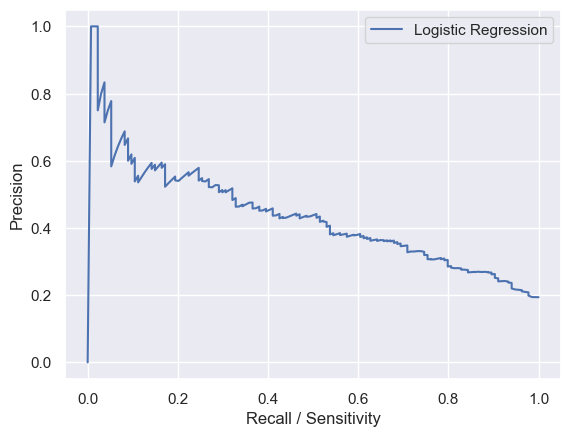

In [27]:
from src.curve import display_precision_recall_curve

# Run this cell to display the ROC curve
display_precision_recall_curve([(prec, recall)], ["Logistic Regression"], "lr_prc.png")

In [28]:
# Lets determine the AUPRC of our model
# No modifications needed in this cell
auprc = auc(recall, prec)

# Display the AUPRC
print(f"Area under the precision-recall curve: {auprc:.3f}")


Area under the precision-recall curve: 0.431


### `2.2.4` (`5 Points`) Calibration Plot

In a calibration plot, the x-axis represents the predicted probabilities (often binned into intervals) that a model assigns to the positive class, while the y-axis represents the actual fraction of positives—the proportion of true outcomes that were correctly predicted within those bins.

The ideal outcome is that the predicted probabilities match the observed frequencies. If a model is perfectly calibrated, the points on the plot will fall on the diagonal line extending from the bottom left corner to the top right corner, known as the line of perfect calibration.

When the points lie above the diagonal, the model is said to be underconfident, meaning that it assigns lower probabilities to the positive outcomes than is justified by the actual outcome. Conversely, when the points are below the diagonal, the model is overconfident, giving higher probabilities than warranted.

Calibration plots are essential for understanding whether you can trust the probabilistic predictions of a model in practical decision-making scenarios. If a model says an event has a 70% chance of happening, you want that event to actually occur approximately 70% of the time when the model makes such a prediction. Calibration plots help verify that the predicted probabilities of a model are aligned with the real-world frequencies.

Implement the function `display_calibration_plot` in `curve.py`. When you are done, run the following cell.

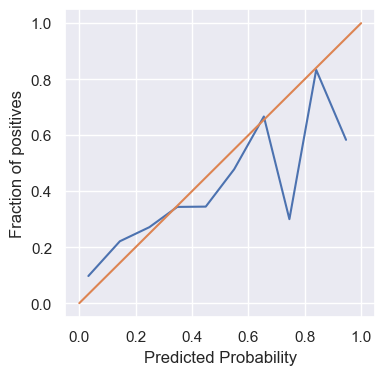

In [29]:
# Run the following cell to display the calibration plot
from src.curve import display_calibration_plot

display_calibration_plot(test_labels, test_probabilities, "en_calibration_curve.png")

Discuss what you observe in the calibration plot above.

<span style="color:blue;">At lower predicted probabilities (below around 0.35), the curve is above the ideal diagonal calibration curve, meaning that model is underconfident and assigns lower probabilities to actual outcomes. At above 0.35 predicted probabilities, points of the curve are generally under the ideal diagnonal calibration curve, meaning that the model is overconfident and assigns higher probabilities to positive outcomes than the actual outcomes. Overall the deviation of the calibration curve from ideal curve is not overly large, except at predicted probability of around 0.75 where the model is severely overconfident.<br/><br/>The model is miscalibrated because the observed confidence is less than the predicted confidence (over-confidence) or the observed confidence is higher than the predicted confidence (under-confidence)</span>

## `2.3` (`30 Points`) Hyperparameter tuning and Cross-Validation

It is impossible to know in advance what the best value of $\lambda$ is for a given model on a given dataset. One way to find a good value is to try training the model with many different values of $\lambda$ and see which one works best - this is known as *hyperparameter tuning*. Let's try it.

### `2.3.1` (`10 Points`) Cross-Validation

Cross validation is a statistical method used for evaluating and comparing machine learning models on a limited data sample. It is often employed to estimate the performance of a model on unseen data, which can be helpful when we need to perform hyperparameter tuning.

The most common method of cross validation is the **k-fold cross validation**. Here's how it works:

1. First, we partion our training data into k equal-sized randomly partitioned subsamples.

2. Of the k subsamples, k-1 subsamples are used to fit the model, and the remaining subsample is used to evaluate the model's performance.

3. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once for evaluation.

4. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation of the overall model's performance.

<div style="text-align:center">
    <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="background-color:white;padding:40px;" width="400"/>
    <figcaption> A visualization of cross validation </figcaption>
</div>

Let's perform a 5-fold cross validation on our model to see how different values of $\lambda$ affect the performance of our model.

In [30]:
# First, let's make a range of lambda values to try.
# Run this cell: No need to change anything
lambdas = np.exp(np.arange(-11, -1.9, 1))

print(f"Lambda values to try: {lambdas}")
print(f"Number of lambda values to try: {len(lambdas)}")

Lambda values to try: [1.67017008e-05 4.53999298e-05 1.23409804e-04 3.35462628e-04
 9.11881966e-04 2.47875218e-03 6.73794700e-03 1.83156389e-02
 4.97870684e-02 1.35335283e-01]
Number of lambda values to try: 10


Implement the function `logistic_regression_cv` in `cross_val.py`. When you are done, run the following cell.

In [31]:
from src.cross_val import logistic_regression_cv

# Run this cell to perform cross-validation
# NOTE: This may take a few minutes to run (It took about 1.5 minutes on the TA's computer)
# NOTE: You may see some warnings about convergence. This is ok!

# In this assignment, we will ignore convergence warnings
log_reg_cv = logistic_regression_cv(train_features, train_labels, 4, lambdas, max_iter=30000)

/Users/stevenang/DataspellProjects/biomedin215/assignments/A6/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stevenang/DataspellProjects/biomedin215/assignments/A6/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

Let's take a look at the average AUROC for each value of $\lambda$ we tried.

In [32]:
# Display the mean AUROC values
print("Mean AUROC values:")
print(log_reg_cv.cv_results_["mean_test_score"])

Mean AUROC values:
[0.73859305 0.75315398 0.74204927 0.74148746 0.74994666 0.74731894
 0.74494723 0.75578881 0.74389472 0.75140098]


### `2.3.2` (`5 Points`) Model Performance

Now that we have the cross-validation results, let's use the lambda of the best model to train a new model on the full training set and evaluate it on the test set. Determine the AUROC and AUPRC values and report them in the answer space below.

In [33]:
# TODO: Use this cell to retrain the model using the best lambda value from the cross validation
# NOTE: Replace the None values with your code

# Collect the best lambda value from the cross-validation results
best_lambda_val = 1/log_reg_cv.best_params_['C'] # TODO: Replace with best lambda value from cross-validation

# Fit a new model with the best lambda value
best_lambda_model = logistic_regression(train_features, train_labels, lambda_=best_lambda_val) # TODO: Use your logistic_regression function from above!

# TODO: Calculate probabilities using the new model
best_lambda_probabilities = best_lambda_model.predict_proba(test_features)[:,1]

# TODO: Calculate the ROC curve using your calc_roc_curve function
best_lr_fpr, best_lr_tpr = calc_roc_curve(test_labels, best_lambda_probabilities)

# TODO: Calculate the new AUROC
best_lr_auroc = auc(best_lr_fpr, best_lr_tpr)

# TODO: Calculate the new precision-recall curve
best_lr_prec, best_lr_recall = calc_precision_recall_curve(test_labels, best_lambda_probabilities)

# TODO: Calculate the new AUPRC
best_lr_auprc = auc(best_lr_recall, best_lr_prec)

In [34]:
# Display the results from the above cell
# Run this cell: No need to change anything
if best_lambda_val is not None:
    print(f"Best value of lambda: {best_lambda_val:.4f}")

if best_lr_auroc is not None:
    print(f"Best AUROC: {best_lr_auroc:.3f}")

if best_lr_auprc is not None:
    print(f"Best AUPRC: {best_lr_auprc:.3f}")


Best value of lambda: 0.0183
Best AUROC: 0.744
Best AUPRC: 0.425


### `2.3.3` (`5 Points`) Test Error Estimation After Feature Selection

Zuko from Fire Nation University has also been attempting to implement a logistic regression model to predict mortality in this cohort. Before training (and without looking at the test data), Zuko performed univariate analyses to find all features that had a statistically significant association with mortality in the training set, and then he only used those features to fit his models.



**Would you expect that the average AUROC values achieved by the model during the cross-validation would be on average larger, smaller, or the same as the AUROC Zuko's model would achieve on the test set? Why?**

<span style="color:blue;">The average AUROC values from cross-validation would typically be larger than those achieved on the test set. This occurs because feature selection is performed on the entire training set before cross-validation, introducing a form of data leakage since the validation folds were indirectly involved in the feature selection process. As a result, the validation performance metrics are biased upward, showing artificially higher performance. When the final model selected through this process is evaluated on the completely independent test set (which was not involved in feature selection), the performance often drops as the model encounters truly unseen patterns and may not generalize as well as the cross-validation results suggested.</span>

### `2.3.4` (`5 Points`) Comparing Feature Selection Methods

**Is Zuko's approach to feature selection the same as what we did earlier by removing the near-zero-variance features in the sense that we should we expect it to have a similar effect on the test vs. cross-validation AUC? Why or why not?**

<span style="color:blue;">It is not the same. We performed the feature selection by removing low variance features prior to splitting train and test sets and cross-validation training. The train and test sets we used have the same features, different from Zuko's approach where the feature selection is done solely based on training data. Hence we would not expect similar effect on test vs. cross-validation AUC difference like in Zuko's model.</span>

### `2.3.5` (`5 Points`) Inspecting Coefficients

Let's check out the 10 features in our model with the largest coefficients. Implement the functions `get_top_features` and `get_log_reg_coefficients` in `models.py`. When you are done, run the following cell.

In [35]:
from src.models import get_top_features

# Run this cell to get the top features
top_features = get_top_features(best_lambda_model, filtered_features, feature_descriptions, model_type="logistic_regression")

In [36]:
# Display the top features
# Run this cell: No need to change anything
display(top_features)

,feature,coef,abs_coef,description,feature_type
259,chartindicator_50,0.228593,0.228593,Apnea Time Interval,chartindicator
503,chartvalue_829,0.220254,0.220254,Potassium (3.5-5.3),chartvalue
275,chartindicator_54,0.218143,0.218143,Assistance Device,chartindicator
312,chartindicator_623,0.204797,0.204797,Restraints Evaluated,chartindicator
368,chartindicator_786,-0.203499,0.203499,Calcium (8.4-10.2),chartindicator
298,chartindicator_604,-0.194911,0.194911,Radiologic Study,chartindicator
0,oxy_drop,0.194152,0.194152,sustained drop in oxygenation after stable ven...,engineered
337,chartindicator_704,-0.193861,0.193861,Turn,chartindicator
367,chartindicator_785,-0.188412,0.188412,CPK/MB,chartindicator
21,C0032227,0.181488,0.181488,pleural effusion,note CUI


## `2.4` (`30 Points`) Gradient Boosted Trees

Let's see if we can get better performance by utilizing a different type of model: gradient boosted trees. 

A **decision tree** is a tree structured model where internal nodes represent conditional tests that operate on features of the data, and each leaf node represents a potential final decision or prediction (in this case, the predicted class label). Let's take a look at a simple three layer example of a decision tree:

<div style="text-align:center">
    <img src="https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/1_decision_tree1.jpg" width="400"/>
    <figcaption> A simple three layer decision tree </figcaption>
</div>

In the image above, let's say the task was to predict if today is a good day to go for a bike ride. First, the tree checks if the humidity feature is either high or low. If Humidity is low, the tree will immediately output the prediction "Yes". If Humidity is high, the tree will check the Weather feature to see if the conditions are "sunny", "overcast", or "rainy". This process repeats until the tree reaches a leaf node, at which point it outputs the prediction. 


By themselves, decision trees are considered weak predictive models that are prone to overfitting. This is where gradient boosting comes in.

Gradient-boosting iteratively trains a series of decision trees, where each subsequent tree is fit on the residual errors of the previous trees. In the context of binary classification, the residual error is the difference between the predicted probability of the positive class and the actual label. At each stage, the model fits a new decision tree to the residual errors of the previous tree, and then adds the new tree to the ensemble of trees that came before it. The final prediction is the sum of the predictions of all the trees in the ensemble.

Tree based methods are powerful for clinical prediction tasks because of their simplicity and interpretability. They mimic human decision-making processes more closely than other algorithms, making them easy to understand and visualize. This interpretability is often a significant advantage in medicine, as understanding the model's decision-making process is often crucial to ensure that the model is safe and effective.

### `2.4.1` (`5 Points`) Parameters for Gradient Boosted Trees

Let's see if a gradient boosted tree can outperform our logistic regression model. To begin, let's first explore the parameters of the gradient boosted tree model we will be using.

Read the documentation of the [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).


Let's think about how various parameters may impact the "bias" and "variance" tradeoff we learned about in A5. Remember that (in the context of bias vs. variance):

- **Bias** refers to the difference between the average prediction of our model and the correct value we are trying to predict. A model is said to have high bias if the model oversimplifies the "true" relationship between the predictors and outcome, generally referred to as "being underfit". Models with high bias often have systematic errors in predictions (errors largely occuring in the same direction with similar magnitude) as the estimates are "biased" away from the true values.

- **Variance** refers to the variability of our model's predictions. A model is said to have high variance if small changes to the training data result in large changes in the predictions. Models with high variance are often **overfit** to the training data, and do not generalize well to new data. 

**For each of the following parameters, please describe what it does and whether it increases or decreases the bias and variance.**

---
#### n_estimators

<span style="color:blue;">The n_estimators is the number of sequential trees (boosting stages) in the model. Overall gradient boosted tree is robust to overfitting, where normally the larger the number of trees, larger the variance and higher risk for overfitting is in the model. A low number of trees may result in high bias where the model oversimplifies the pattern within data.</span>

---
#### max_depth

<span style="color:blue;">The max_depth indicates the maximum depth of the tree. The larger the parameter, the higher the risk is for overfitting (high variance) as the model may learn relationship very specific to the sample by going very deep into the decision tree. A low number may also result in insufficient learning of the data patterns to outcome hence introduce high bias.</span>

---
#### learning_rate

<span style="color:blue;">The learning rate shrinks the contribution of each tree, meaning that larger the number, faster the model adjusts to the added decision trees. The lower the learning rate, the longer time model needs to train the model (high bias; needs higher number of trees).</span>

---
#### min_samples_split and min_samples_leaf

> Note: These two are pretty similar and can be answered together (they have the same effect on bias and variance).

<span style="color:blue;">The min_samples_split is the minimum number of samples required to split an internal node, and the min_samples_leaf is the minimum number of samples required to be at a leaf node. Higher values for these 2 prevents a model from overfitting (high variance) as it reduces chances for learning highly specific patterns of small group fo samples. However, lower values may lead to under-fitting (high bias).</span>

### `2.4.2a` (`2 Points`) Setting up a Gradient Boosted Tree Model

Let's set up a cross validation experiment to find the best parameters for our gradient boosted tree model. Implement the function `gradient_boosted_tree` in `models.py`. When you are done, run the following cell.

In [37]:
from src.models import gradient_boosted_tree

# Run this cell to fit the model
gbt_model = gradient_boosted_tree(train_features, train_labels, n_estimators=100)

In [38]:
# Let's see how this model performed
# Run this cell to see the accuracy, precision, and recall
# NOTE: No need to change anything in this cell

test_predictions = gbt_model.predict(test_features)

# Calculate the accuracy
gbt_accuracy = accuracy(test_labels, test_predictions)

# Calculate the confusion matrix
gbt_con_matrix = confusion_matrix(test_labels, test_predictions)

# Calculate the sensitivity
gbt_sensitivity = sensitivity(gbt_con_matrix)

# Calculate the specificity
gbt_specificity = specificity(gbt_con_matrix)

# Calculate the precision
gbt_precision = precision(gbt_con_matrix)

# Display the results
print(f"Accuracy of the model on the test set: {gbt_accuracy:.3f}")
print(f"Sensitivity of the model on the test set: {gbt_sensitivity:.3f}")
print(f"Specificity of the model on the test set: {gbt_specificity:.3f}")
print(f"Precision of the model on the test set: {gbt_precision:.3f}")

Accuracy of the model on the test set: 0.821
Sensitivity of the model on the test set: 0.201
Specificity of the model on the test set: 0.969
Precision of the model on the test set: 0.614


### `2.4.2b` (`3 Points`) Cross-Validating Gradient Boosted Trees

Let's set up a cross validation experiment to find the best parameters for our gradient boosted tree model. Implement the function `gradient_boosting_cv` in `cross_val.py`. When you are done, run the following cell.

In [39]:
# Let's try a range of n_estimators values
# Run this cell: No need to change anything
n_estimators_list = np.arange(0, 201, 5)
n_estimators_list[0] = 2

print(f"We are trying {len(n_estimators_list)} values of n_estimators: {n_estimators_list}")

We are trying 41 values of n_estimators: [  2   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200]


In [40]:
from src.cross_val import gradient_boosting_cv

# Run this cell to perform cross-validation
# NOTE: This cell may take a few minutes to run (It took about 1.5 minutes on the TA's computer)
gb_cv = gradient_boosting_cv(train_features, train_labels, 4, n_estimators_list)

### `2.4.3` (`5 Points`) Model Performance

Let's see how well our model performs on the test set with the best parameters we found during cross-validation. Determine the AUROC and AUPRC values.

In [41]:
# TODO: Use this cell to train a model with the best n_estimators value from the cross-validation

# TODO: Collect the best n_estimators value from the cross-validation results
best_n_estimators_val = gb_cv.best_params_['n_estimators'] # Replace with best n_estimators value from cross-validation

# TODO: Fit a new model with the best n_estimators value
best_tree_model = gradient_boosted_tree(train_features, train_labels, n_estimators=best_n_estimators_val) # Use your gradient_boosted_tree function from above!

# TODO: Calculate the probabilities using the new model
test_probabilities = best_tree_model.predict(test_features) # Replace with probabilities from the new model

# TODO: Calculate the ROC curve using your calc_roc_curve function
best_tree_fpr, best_tree_tpr = calc_roc_curve(test_labels, test_probabilities)

# Calculate the new AUROC
best_tree_auroc = auc(best_tree_fpr, best_tree_tpr)

# Calculate the new precision-recall curve using your calc_precision_recall_curve function
best_tree_prec, best_tree_recall = calc_precision_recall_curve(test_labels, test_probabilities)

# Calculate the new AUPRC
best_tree_auprc = auc(best_tree_recall, best_tree_prec)


In [42]:
# Display the results from the above cell
# Run this cell: No need to change anything
if best_n_estimators_val is not None:
    print(f"Best value of best_n_estimators_val: {best_n_estimators_val:.4f}")

if best_tree_auroc is not None:
    print(f"Best AUROC: {best_tree_auroc:.3f}")

if best_tree_auprc is not None:
    print(f"Best AUPRC: {best_tree_auprc:.3f}")


Best value of best_n_estimators_val: 60.0000
Best AUROC: 0.568
Best AUPRC: 0.367


Finally, let's take a look at the difference between the curves!

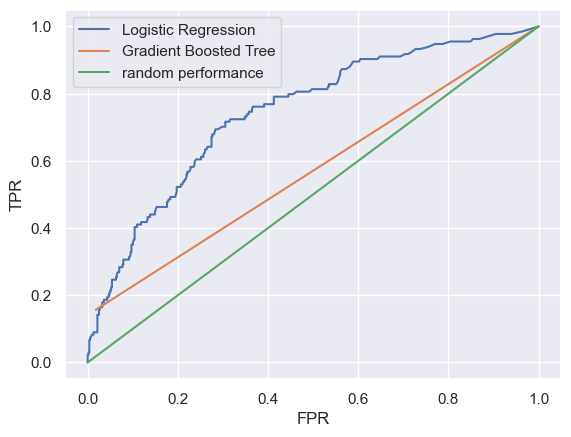

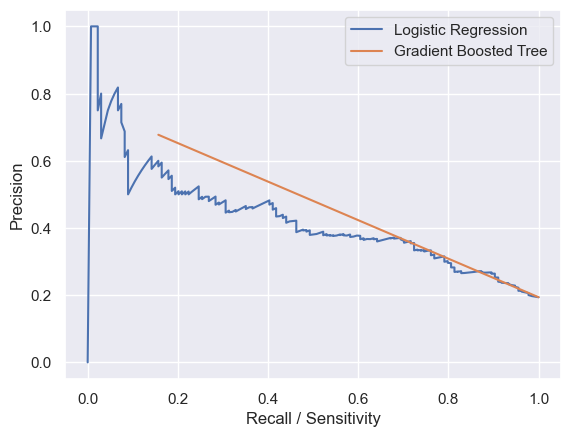

In [43]:
# Run this cell! No need to change anything
if best_lr_fpr is not None and best_tree_prec is not None:
    display_roc_curve([(best_lr_fpr, best_lr_tpr), (best_tree_fpr, best_tree_tpr)],
                    ["Logistic Regression", "Gradient Boosted Tree"],
                    "lr_gbt_roc.png")

    display_precision_recall_curve([(best_lr_prec, best_lr_recall), (best_tree_prec, best_tree_recall)],
                                    ["Logistic Regression", "Gradient Boosted Tree"],
                                    "lr_gbt_prc.png")

### `2.4.4` (`5 Points`) Variable Importance

Let's determine the top 10 most important features in our model, using the function `get_tree_feature_importance` that you previously implemented in `models.py`, by running the following cell.

In [44]:
# Run this cell to get the top features
top_10_tree_features = get_top_features(best_tree_model, filtered_features, feature_descriptions, model_type="gradient_boosted_tree")

In [45]:
# Display the top features
# Run this cell: No need to change anything
display(top_10_tree_features)

,feature,importance,abs_importance,description,feature_type
465,chartvalue_198,0.088443,0.088443,GCS Total,chartvalue
2,age_in_days,0.086778,0.086778,age in days,demographic
488,chartvalue_778,0.051097,0.051097,Arterial PaCO2,chartvalue
323,chartindicator_655,0.043485,0.043485,Spontaneous Movement,chartindicator
472,chartvalue_454,0.042967,0.042967,Motor Response,chartvalue
491,chartvalue_781,0.034200,0.034200,BUN (6-20),chartvalue
237,chartindicator_412,0.032179,0.032179,Incision/Wound #2,chartindicator
279,chartindicator_548,0.032156,0.032156,Position Change,chartindicator
507,chartvalue_87,0.031823,0.031823,Braden Score,chartvalue
487,chartvalue_777,0.023534,0.023534,Arterial CO2(Calc),chartvalue


Let's learn about how feature importance is calculated in `sklearn`. Read the following documentation sections:
1. [Interpretation with Feature Importance](https://scikit-learn.org/stable/modules/ensemble.html#interpretation-with-feature-importance)

2. [1.11.2.5. Feature importance evaluation](https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation)

**Would a variable that is only split on in the first tree be more important than a variable that is only split on in the 200th tree?**



<span style="color:blue;">The relative order of variable used in the sequential trees does not really determine their importance. The importance of the feature in 1 tree determined by <br/><br/>1) relative rank of the feature in 1 tree, and <br/><br/>2) how often a feature is used in split points of a tree. <br/><br/>The overall feature importance is determined by averaging the feature importances in all trees. Hence, the order of feature usages in the sequence of trees alone cannot determine their relative importance.</span>

**Which types of feature seem to be the most useful? Why do you think that is the case?**

<span style="color:blue;">Most top 10 features in the table above seem to have non-categorical values, such as age in days, arterial PaCO2, motor response, braden score and BUN. This means that it is more frequent to use non-categorical features as split points in the tree and that they are often early split-points (higher ranks) in the tree that allows splitting of large fraction of the input samples. In comparison to categorical inputs, it may be easier to find a suitable decision point for non-categorical features to split the positive and negative labeled data.</span>

### `2.4.5` (`5 Points`) Partial Dependence Plots

One of the nice things about tree ensembles is that they can automatically find and exploit interactions between features. One of the ways we can visualize these interactions is by utilizing partial dependence plots.

A partial dependence plot (PDP) visualizes the relationship between a subset of features and the predicted outcome of a machine learning model, averaged over the distribution of the other features in the dataset. In other words, it shows the effect of a feature (or features) on the prediction while holding other features constant.

A negative partial dependence value for a particular feature value indicates that feature value has a negative effect on the prediction, while a positive partial dependence value indicates that feature value has a positive effect on the prediction. A partial dependence value of 0 indicates that the feature value has no effect on the prediction (holding other features constant).

Implement the function `display_partial_dependence` in `inspection.py`. When you are done, run the following cell.

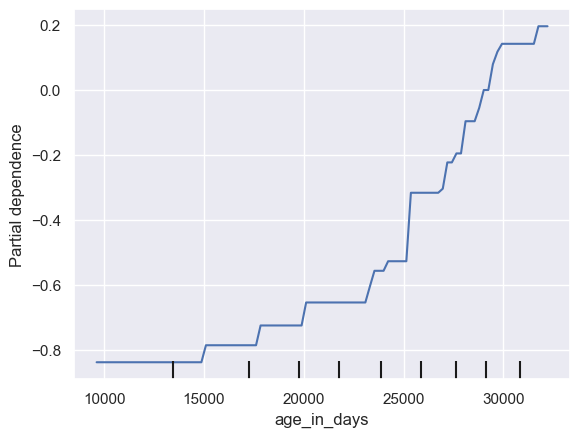

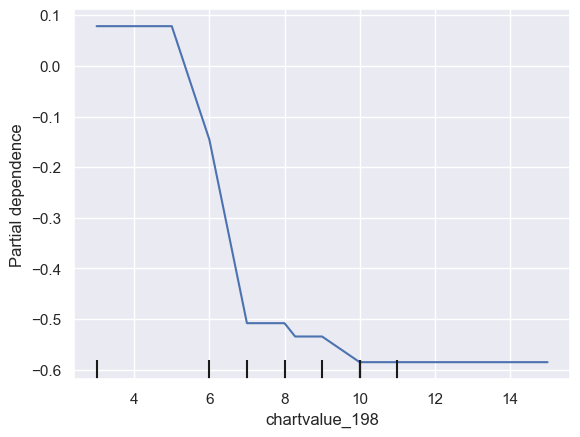

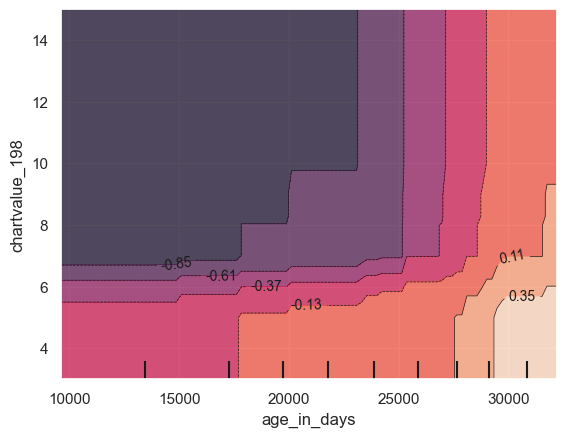

In [46]:
from src.inspection import display_partial_dependence

# Run this cell to plot the partial dependence of age (by itself)
display_partial_dependence(best_tree_model, filtered_features, ["age_in_days"], "gbt_age_pdp.png")

# Run this cell to plot the partial dependence of `chartvalue_198` aka GCS total (by itself)
display_partial_dependence(best_tree_model, filtered_features, ["chartvalue_198"], "gbt_gcs_pdp.png")

# Run this cell to plot the partial dependence of age and GCS total
display_partial_dependence(best_tree_model, filtered_features, [("age_in_days", "chartvalue_198")], "gbt_age_gcs_pdp.png")

**Is the effect of age on the model's predictions linear?**

<span style="color:blue;">The effect is linear within some ranges of the age. Prior to 15000 days, the partial dependence is mostly constant. Between 15000 to 25000 days, the partial dependence increases generally linearly. After 25000 days, the partial dependence increases in a faster manner (larger slope) than prior to 25000 days.</span>

**What combination of these two features is most associated with worse outcomes? Do you think the result makes sense? Why or why not?**

> This article on the [Glasgow Coma Scale](https://en.wikipedia.org/wiki/Glasgow_Coma_Scale) may be helpful!

<span style="color:blue;">Worse outcomes are indicated by high partial dependence between these 2 variables (where the 2 variables have the highest positive impact (label=1) on prediction for mortality). This is the at the 0.35 partial dependence line, with age larger than 30000 days and GCS under 6. The results make sense, as elder population with low response / low consciousness after a brain injury could have the largest risk for death.</span>

### `2.4.6` (`5 Points`) Investigating the Effect of Age

Something is strange about the range of the age variable in the partial dependence plot above. Let's investigate this further.

Implement the function `display_age_distribution` in `inspection.py`. When you are done, run the following cell.

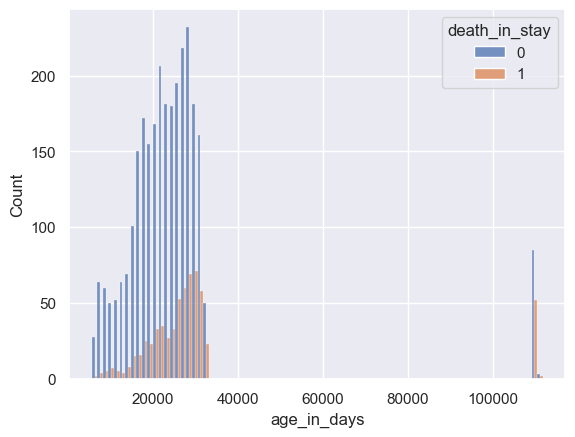

In [47]:
from src.inspection import display_age_distribution

# Run this cell to display the age distribution
display_age_distribution(filtered_features, labels, "gbt_age_dist.png")

**What did you discover about the age variable?**

<span style="color:blue;">Most subjects' age lie in the range prior to 38000 days (104 years), with some subjects having larger than 100000 days in age, which does not make sense as it corresponds to 273 years. There might be some errors in preprocessing for age.</span>

**Do you think this adversely affects the test set peformance of the gradient boosted tree model?**

<span style="color:blue;">Judging from the partial dependence plot for age_in_days above, it seems like the partial dependence values are mainly associated with the age in days range below 35000 which means that the outlier errors may not have affected the trained gradient boosted tree model significantly. Hence there may be only minimal adverse effects to the test set performance.</span>

**What do you think the effect is on the logistic regression model? (HINT: Was `age_in_years` included in the top 10 features of the logistic regression model?)**

<span style="color:blue;">The age_in_days feature is not part of the top 10 features for logistic regression model. The outlier in this feature may have affected the logistic regression model more adversely than the gradient boosted tree model.</span>

## `2.5` (`5 Points`) Proper Evaluation of Predictive Models

Given that we randomly split the data into training and test sets, do you think that the test set accuracy would be a good estimate, an overestimate, or an underestimate of the accuracy if we used this model to predict mortality for patients in the coming year? 

Justify your answer in one or two sentences. Give a suggestion for an alternative data-splitting method that could be better and why.

<span style="color:blue;">Using a held-out test set to evaluate model performance is essential for simulating real-world applications. However, in our case, while the test set shows high overall accuracy, this metric is misleading due to the model's poor sensitivity despite high specificity. This means our model struggles to identify patients at risk of mortality during admission - a crucial limitation for practical clinical applications. This performance disparity largely stems from the significant class imbalance in our training data, where negative cases (survivors) vastly outnumber positive cases (non-survivors).<br/><br/>To address this, we could implement oversampling techniques (like SMOTE) exclusively on the training data to balance the classes during model learning. By keeping the test set unchanged, we maintain its representation of real-world distributions while potentially improving the model's ability to detect positive cases. This approach might help achieve better sensitivity without sacrificing specificity, providing a more clinically useful model when evaluated on the original, imbalanced test set.</span>

# Congratulations! 🏁 🏁 🏁
You have completed the final coding assignment of `BIOMEDIN 215`! 🎉 🙌 🎊 

We hope you have enjoyed utilizing the Python version of the assignments in the course! 

We would love to hear your thoughts on how we can improve the assignments for future students. If you haven't already, please fill out the feedback form below. 

➡️[Feedback form](https://docs.google.com/forms/d/e/1FAIpQLSevaufyQLf5HAFTStk15OJ5idA5OkdLDMsEp8v-fSoPlXKxow/viewform?usp=sf_link)

    - Your BIOMEDIN 215 Teaching Team ❤️

---

# Submission Instructions ✅

There are two files you must submit for this assignment:

1. A `PDF` of this notebook.
- **Please clear any large cell outputs from executed code cells before creating the PDF.**
    - Including short printouts is fine, but please try to clear any large outputs such as dataframe printouts. This makes it easier for us to grade your assignments!
- To export the notebook to PDF, you may need to first create an HTML version, and then convert it to PDF.

2. A `zip` file containing your code generated by the provided `create_submission_zip.py` script:
- Open the `create_submission_zip.py` file and enter your SUNet ID where indicated.
- Run the script via `python create_submission_zip.py` to generate a file titled `<your_SUNetID>_submission_A6.zip` in the root project directory.
